# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and imrpove the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-09-21 12:03:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 64.233.184.128, 64.233.167.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   105MB/s    in 5.5s    

2021-09-21 12:03:22 (89.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
# Walk through 10 classes of food image data
for dirpath, dirname, filenames in os.walk("10_food_classes_all_data"):
  print("There are " + str(len(dirname)) + " directories and " + str(len(filenames)) + " images in " + dirpath)

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 10 directories and 0 imag

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + "/" + target_class

  # Get a random image
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False);

  print("Image shape: " + str(img.shape)) # Show the shape of the image
  return img

Image shape: (512, 512, 3)


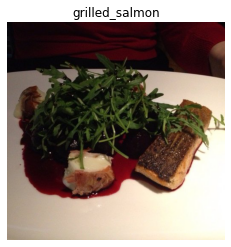

In [ ]:
img = view_random_image(train_dir,
                        random.choice(class_names))

### 2. Preprocess the data

- Create train and test data generators and rescale the data
- Turn it into batches

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical") # changed to categorical

test_data = test_datagen.flow_from_directory(test_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model
model_8 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(), # we don't have to write 2 since it is the default parameter
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

### 4. Fit the model

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 470s 2s/step - loss: 2.1186 - accuracy: 0.2319 - val_loss: 2.0250 - val_accuracy: 0.2640
Epoch 2/5
235/235 [==============================] - 463s 2s/step - loss: 1.8641 - accuracy: 0.3533 - val_loss: 1.9137 - val_accuracy: 0.3224
Epoch 3/5
235/235 [==============================] - 469s 2s/step - loss: 1.4318 - accuracy: 0.5296 - val_loss: 1.9822 - val_accuracy: 0.3348
Epoch 4/5
235/235 [==============================] - 475s 2s/step - loss: 0.6953 - accuracy: 0.7745 - val_loss: 2.7458 - val_accuracy: 0.2724
Epoch 5/5
235/235 [==============================] - 475s 2s/step - loss: 0.2011 - accuracy: 0.9421 - val_loss: 4.0537 - val_accuracy: 0.2596


### 5. Evaluate the model

In [ ]:
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 13s 162ms/step - loss: 3.7979 - accuracy: 0.2656


[3.797865629196167, 0.2655999958515167]

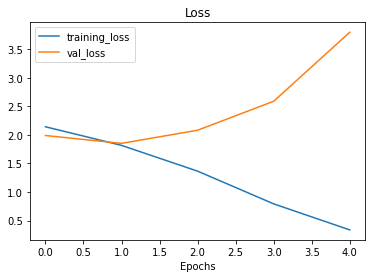

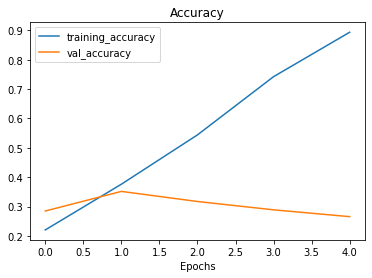

In [ ]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

It seems our model is **overfitting** the training set quite badly...

### 6. Adjust the model hypterparameters

Let's try and fix overfitting by:
- **Get more data** - having more data gives a model more opportunity to learn diverse patterns
- **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model. One way to simplyf a model is to reduce number of layers or reduce number of hidden units in layers
- **Data augmentation** - it manipulates the training data in such a way to add more diversity to it without altering the original data
- **Transfer learning** - it leverages the patterns another model has learned on similar data to your own and allows you to see those patterns on your own dataset

In [ ]:
# Let's simplify the model
# Let's try to remove 2 convolutional layers
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 214ms/step - loss: 2.1105 - accuracy: 0.2408 - val_loss: 2.0246 - val_accuracy: 0.2940
Epoch 2/5
235/235 [==============================] - 50s 215ms/step - loss: 1.6433 - accuracy: 0.4505 - val_loss: 1.9647 - val_accuracy: 0.3132
Epoch 3/5
235/235 [==============================] - 50s 215ms/step - loss: 1.0832 - accuracy: 0.6589 - val_loss: 2.0966 - val_accuracy: 0.3052
Epoch 4/5
235/235 [==============================] - 50s 212ms/step - loss: 0.5826 - accuracy: 0.8340 - val_loss: 2.5600 - val_accuracy: 0.2920
Epoch 5/5
235/235 [==============================] - 50s 212ms/step - loss: 0.2545 - accuracy: 0.9433 - val_loss: 3.1407 - val_accuracy: 0.2848


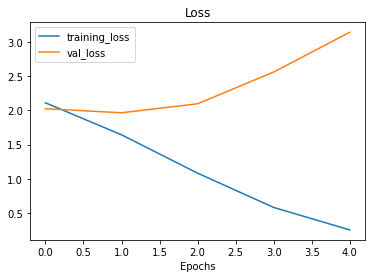

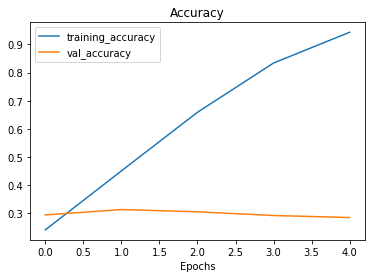

In [ ]:
# Check out the loss curves
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

"Simplifying the model" experiment didn't work. Let's try **data augmentation**

#### Trying to reduce overfitting with  **data augmentation**

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.0,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical",
                                                                   shuffle=True)

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model fit it with augmented training data
model_10 = tf.keras.models.clone_model(model_8)

# Compile the model
model_10.compile(loss="categorical_crossentropy",
                 optimizer="Adam",
                 metrics=["accuracy"])

In [ ]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 130s 552ms/step - loss: 2.2518 - accuracy: 0.1605 - val_loss: 2.1922 - val_accuracy: 0.1896
Epoch 2/5
235/235 [==============================] - 129s 547ms/step - loss: 2.1668 - accuracy: 0.1969 - val_loss: 2.1110 - val_accuracy: 0.2112
Epoch 3/5
235/235 [==============================] - 129s 548ms/step - loss: 2.1079 - accuracy: 0.2383 - val_loss: 1.9196 - val_accuracy: 0.3252
Epoch 4/5
235/235 [==============================] - 129s 550ms/step - loss: 2.0287 - accuracy: 0.2857 - val_loss: 1.9211 - val_accuracy: 0.3180
Epoch 5/5
235/235 [==============================] - 130s 552ms/step - loss: 1.9878 - accuracy: 0.2993 - val_loss: 1.8246 - val_accuracy: 0.3772


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 3.7979 - accuracy: 0.2656


[3.7978675365448, 0.2655999958515167]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 1.8246 - accuracy: 0.3772


[1.824643611907959, 0.37720000743865967]

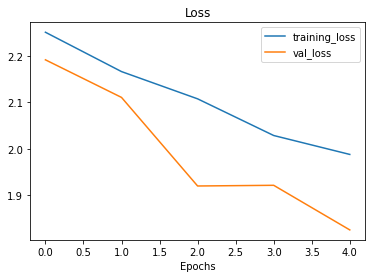

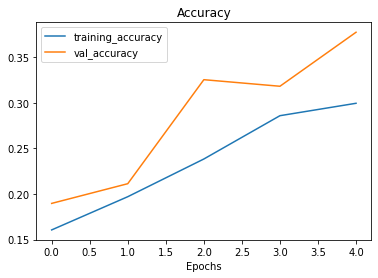

In [ ]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

Loss curves are much better than the baseline model and they look like they're heading in the right direction so if we were to train longer, we might see further improvements

### 7. Repeat until satisfied

We could keep going...

By running lots of experiments:
- Restructuring our model's architecture (increasing layers/hidden units)
- Adjust the learning rate
- Try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- Training for longer (e.g. 10 epochs instead of 5 epochs)
- Try **transfer learning**

### Making a prediction with our model

Let's use our trained model to make some predictions on our own custom predictions

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-09-21 13:44:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.04s   

2021-09-21 13:44:57 (94.0 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2021-09-21 13:44:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round


  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

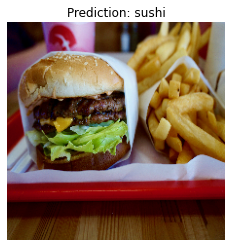

In [ ]:
# Make a prediction using model_10
pred_and_plot(model_10, "03-hamburger.jpeg", class_names)

Our model's predictions aren't very good, this is because it's only performing at ~37% accuracy on the test dataset.

In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets
